<h1 style="text-align: center;" markdown="1">Machine Learning Algorithms for Poverty Prediction</h1> 
<h2 style="text-align: center;" markdown="2">A project of the World Bank's Knowledge for Change Program</h2>
<h3 style="text-align: center;" markdown="3">(KCP, Grant TF0A4534)</h3>


> *This notebook is part of a series that has been developed as an empirical comparative assessment of machine learning classification algorithms applied to poverty prediction. The objectives of this project are to explore how well machine learning algorithms perform when given the task to identify the poor in a given population, and to provide a resource of machine learning techniques for researchers, data scientists, and statisticians in developing countries.*

<h1 style="text-align: center;" markdown="3">Comparison of Advanced Algorithms</h1> 
<h2 style="text-align: center;" markdown="3">Indonesia Poverty Prediction</h2> 

# Table of Contents
[Comparison of Advanced Algorithms Introduction](#introduction)    
[Compare All Models](#compare)   
[ROC of Advanced Models](#roc)  
[Summary](#summary)

# Comparison of Advanced Algorithms Introduction <a class="anchor" id="introduction"></a>

We have introduced a series of advanced models and techniques in the past few notebooks: the simple ensemble, stacked ensemble, automated machine learning, and deep factorization machine classifiers. While these models are mathematically unique, they share one important feature in common: computational complexity. Each of the advanced models requires a substantial amount of training time and/or resources (e.g., a GPU). It is therefore worth exploring: 

***What is gained by using the advanced models?***

In this short notebook we will rank the advanced models against **all of the other full-featured models**, from logistic regression onward. We'll calculate a measure of overall performance using the _mean rank_ across the metrics that have been employed throughout the project.

First, load the neccessary libraries.

In [1]:
%matplotlib inline

import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

# Add our local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))
from data.sampler import Sampler
from models import evaluation
from visualization import visualize
from data.load_data import (get_country_filepaths, 
                            split_features_labels_weights, 
                            load_data)
COUNTRY = 'idn'
TRAIN_PATH, TEST_PATH, QUESTIONS_PATH = get_country_filepaths(COUNTRY)

/home/bull/miniconda3/envs/worldbank-poverty-test/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Compare All Models <a class="anchor" id="compare"></a>

Here we'll first load the saved metrics from the first phase of the project (this file is automatically generated in the results-idn notebook, 11.1).

In [2]:
idn_phase1 = pd.read_csv(Path('../data/processed/idn/idn-master-results.csv'))

In [3]:
idn_phase1.head()

,name,accuracy,recall,precision,f1,cross_entropy,roc_auc,cohen_kappa,pov_rate_error,mean_rank
0,mlp_full_undersample_cv,0.857694,0.854518,0.440280,0.581136,0.308514,0.932805,0.481756,0.108348,9.250
1,xgb_full_undersample_cv,0.835837,0.876320,0.403156,0.552247,0.366854,0.928831,0.453724,0.139476,10.125
2,lr_full_oversample,0.854459,0.843033,0.433238,0.572346,0.344135,0.926334,0.473514,0.107608,10.625
3,lr_full_undersample,0.830133,0.883593,0.394889,0.545836,0.392892,0.926233,0.444930,0.141912,11.875
4,lr_full_oversample_cv,0.851611,0.838116,0.427456,0.566159,0.348544,0.925356,0.471316,0.107453,12.125


As we can see, all of the usual metrics are saved to this DataFrame.

Here is the list of models from the first phase that we will consider.

In [4]:
idn_phase1.name

0             mlp_full_undersample_cv
1             xgb_full_undersample_cv
2                  lr_full_oversample
3                 lr_full_undersample
4               lr_full_oversample_cv
5                    lr_full_classwts
6                 svm_full_oversample
7          rf_full_undersample_cv_ada
8                    rf_full_classwts
9                 lda_full_oversample
10             lda_full_oversample_cv
11                  svm_full_classwts
12               xgb_full_undersample
13                xgb_full_oversample
14          lr_l1_feats_oversample_cv
15                mlp_full_oversample
16               mlp_full_undersample
17               lda_full_undersample
18                 rf_full_oversample
19                dl_full_undersample
20             dl_full_undersample_cv
21            svm_full_undersample_cv
22    nb_full_undersample_cv_isotonic
23                 dl_full_oversample
24               svm_full_undersample
25                rf_full_undersample
26         d

Now we will load the advanced models' metrics

In [5]:
# make metric-friendly list
metrics = [row[1].to_dict() for row in idn_phase1.iterrows()]

# add advanced models
advanced_model_names = ['deepfm_full_cv',
                        'deepfm_full_undersample_cv', 
                        'automl_tpot', 
                        'ensemble_simple', 
                        'ensemble_stacked']
metrics += [evaluation.load_model_metrics(f, COUNTRY) for f in advanced_model_names]

And now we're ready to show results. We don't want to plot 35 ROC curves, so we'll simply look at the rank-ordered table

In [6]:
results = visualize.display_model_comparison(metrics, 
                                             show_roc=False, 
                                             show_cm=False, 
                                             show_pov_rate_error=False, 
                                             highlight_best=True, 
                                             transpose=True, 
                                             rank_order=True)

,accuracy,recall,precision,f1,cross_entropy,roc_auc,cohen_kappa,mean_rank
deepfm_full_cv,0.932415,0.525986,0.65625,0.583942,0.161349,0.943099,0.547647,7.28571
mlp_full_undersample_cv,0.857694,0.854518,0.44028,0.581136,0.308514,0.932805,0.481756,7.71429
ensemble_simple,0.845008,0.873189,0.418192,0.565535,0.34436,0.93394,0.464792,9.28571
lr_full_oversample,0.854459,0.843033,0.433238,0.572346,0.344135,0.926334,0.473514,9.42857
xgb_full_undersample_cv,0.835837,0.87632,0.403156,0.552247,0.366854,0.928831,0.453724,11.1429
lr_full_oversample_cv,0.851611,0.838116,0.427456,0.566159,0.348544,0.925356,0.471316,11.2857
ensemble_stacked,0.827208,0.886484,0.390749,0.542411,0.352263,0.929823,0.44074,12.7143
svm_full_oversample,0.867253,0.755508,0.455099,0.568031,0.305525,0.909297,0.454544,13.1429
lr_full_undersample,0.830133,0.883593,0.394889,0.545836,0.392892,0.926233,0.44493,13.4286
rf_full_classwts,0.894672,0.550596,0.543572,0.547061,0.285334,0.904138,0.482144,13.7143


We see that one of the advanced models does take the top spot, and that the advanced models overall claim each of the metrics, with the exception of recall, which goes to `lda_full_classwts`. The DeepFM model takes the most top spots overall.

Of course, for each of these models we've seen that expertise in one metric typically comes at the expense of expertise in another. 

# ROC of Advanced Models <a class="anchor" id="roc"></a>

Each of the top models did well when ranked against the others, although in practice the performant advantages may not outweight the disadvantages brought on by complexity.

As a reminder, we plot the ROC curves and rerank the advanced models below.

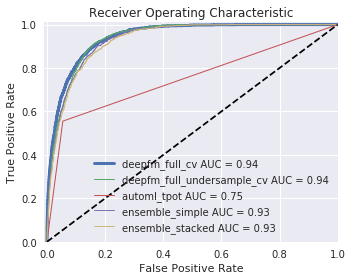

,accuracy,recall,precision,f1,cross_entropy,roc_auc,cohen_kappa,mean_rank
deepfm_full_cv,0.932415,0.525986,0.65625,0.583942,0.161349,0.943099,0.547647,1.57143
ensemble_simple,0.845008,0.873189,0.418192,0.565535,0.34436,0.93394,0.464792,2.85714
automl_tpot,0.896794,0.555481,0.592262,0.573282,0.625172,0.750474,0.472997,3.14286
deepfm_full_undersample_cv,0.840438,0.915466,0.352035,0.508522,0.36728,0.939532,0.434918,3.71429
ensemble_stacked,0.827208,0.886484,0.390749,0.542411,0.352263,0.929823,0.44074,3.71429


In [7]:
results = visualize.display_model_comparison([evaluation.load_model_metrics(f, COUNTRY) for f in advanced_model_names], 
                                             show_roc=True, 
                                             show_cm=False, 
                                             transpose=True, 
                                             rank_order=True)

The simple ensemble takes the top spot, but recall that it's not as simple as it seems. It uses many different models trained using different class balancing techniques, which leads to a high-quality hetergeneous ensemble of predictions. This allows for the "simplicity" of merely taking the mean of the ensemble to generate predictions.

The TPOT approach does well too, but at the cost of non-informative class probabilities (remember, there were only a few unique values for class probabilities, and they were all near 0.5). The deep models sit right in the middle, but as we shall see in a later notebook, they generalize better to _new years_ (that is, predicting on entirely new data sets of different years of the same survey used here).

# Summary <a class="anchor" id="summary"></a>

The simple ensemble tops the list of both advanced models and overall, probably due to the complexity of its component models. When we use the models to predict on new data sets, the rank order of these results will change because some models are better than others at generalizing to other years.